In [1]:
import os, sys, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
pred = np.load('../res/Indian_test_1717031085pred.npy')

In [57]:
res = json.loads(open('../res/Indian_test_1717031085json').read())

In [58]:
matrix = []
for row in res['eval']['confusion'].replace("'", "").replace(",", "").split(']'):
    ll = []
    for i in row.strip('[').strip('\n').strip(' [').split(' '):
        try:
            ll.append(int(i))
        except:
            pass
    if len(ll)>0:
        matrix.append(ll)

In [59]:
df = pd.DataFrame(matrix, columns=list(range(len(matrix[0]))))

In [60]:
df

,0,1,2
0,950,0,2
1,147,2209,79
2,0,0,573


In [62]:
ori = [72,2033,93]
new = [174,2209,79]
def pp(t):
    print(t[0]/sum(t), t[2]/sum(t))
pp(ori), pp(new)

0.03275705186533212 0.042311191992720654
0.07067424857839155 0.032087733549959384


(None, None)

In [63]:
import sys
sys.path.append('../')
import plot

In [64]:
from scipy import io as sio

In [65]:
raw_data = sio.loadmat('../../data/Indian/Indian_20new_split.mat')
TR, TE, data = raw_data['TR'], raw_data['TE'], raw_data['input']
label = TR + TE

In [66]:
def get_pred(check_in):
    label = TR + TE
    temp = pred * (label>0).astype(np.uint)
    
    con = (temp==check_in[0])
    for c in check_in[1:]:
        con = con | (temp==c)
    temp = temp * con
    return temp

def get_label(check_in):
    label = TR + TE
    temp = label - 1
    con = (temp==check_in[0])
    for c in check_in[1:]:
        con = con | (temp==c)
    temp = temp * con
    return temp

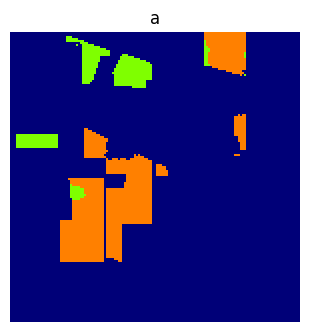

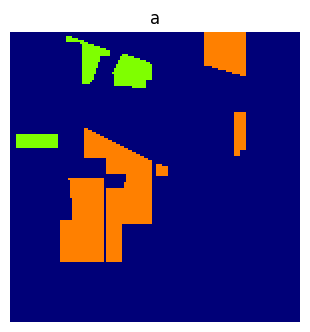

In [68]:
check_in = [0,1,2]

plot.plot_one('a', get_pred(check_in), label, './test')
plot.plot_one('a', get_label(check_in), label, './test_real')

In [71]:
 np.unique(pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([5302, 9919, 5804], dtype=int64))

In [53]:
def process(T):
    for i in range(1,17):
        if i not in [10,11,12]:
            T[T==i] = 0
    T[T==10]=1
    T[T==11]=2
    T[T==12]=3
    return T

In [55]:
raw_data = sio.loadmat('../../data/Indian/Indian_20_split.mat')
TR, TE, data = raw_data['TR'], raw_data['TE'], raw_data['input']
label = TR + TE
TR = process(TR)
TE = process(TE)
print(np.unique(TR, return_counts=True))
print(np.unique(TE, return_counts=True))
raw_data['TR'] = TR
raw_data['TE'] = TE
sio.savemat('../../data/Indian/Indian_20new_split.mat', raw_data)

(array([0, 1, 2, 3], dtype=uint8), array([20965,    20,    20,    20], dtype=int64))
(array([0, 1, 2, 3], dtype=uint8), array([17065,   952,  2435,   573], dtype=int64))


ll = np.asarray([0]*10)
ll[5] = 1
ll

In [3]:
ll = np.asarray([0]*10)
ll[5:8] = 1
ll

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0])